# AI Project for SWE 485 | G3 | Water Quality
Student Name : Khawlah Alnayel | Student ID : 441200943 

Student Name : Sarah Alomar  | Student ID : 441200917 

 Student Name : Hessah Aljohaimy  | Student ID : 441201152

# Introducation
 Every human being needs clean water for intake. The World Health Organization (WHO) estimates that 80% of illnesses are water-borne. Industrialization, discharge of internal waste, radioactive waste, population growth, unnecessary use of pesticides, fertilizers and leakage from water tanks are key sources of water effluence. In Addition, there are negative health effects associated with these wastes. Different chemicals have dissimilar affects depending on their positions and categories. Bacterial, viral and parasitic diseases like typhoid, cholera, encephalitis, poliomyelitis, hepatitis, skin infection and gastrointestinal disease are spreading through polluted water [1]. 

Therefore, it is recommended to examine the water quality on a regular basis to avoid its destructive effects on human health. As a matter of fact, the availability of safe drinking water is one of the most vital components of effective health protection policy and constitutes a fundamental human right. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions [2]. 

Our aim to predict the quality of water from 3272 different water bodies where we have the pH value ,Hardness , Solids , Chloramines , Sulfate , Conductivity , Organic carbon , Trihalomethanes , Turbidity all in different values then we have the probability to indicate whether the water is safe or not and to understand the relationship between these different values and the quality of water. 

[1]mportance of safe drinking water for human life - researchgate (no date). Available at: https://www.researchgate.net/publication/341539508_Importance_of_Safe_Drinking_Water_for_Human_Life (Accessed: April 23, 2023).
 
[2]Kadiwal, A. (2021) Water quality, Kaggle. Available at: https://www.kaggle.com/datasets/adityakadiwal/water-potability (Accessed: April 23, 2023). 

In [4]:
#Importing Important Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean 
from pandas.core.arrays.categorical import contains
import statistics
import seaborn as sns

# Data 
Our dataset is called Water quality, we take it from Kaggle website. The dataset provide information about factors that affect the quality of water if it is safe for human. The link (https://www.kaggle.com/datasets/adityakadiwal/water-potability) show the source data. It consist of 3276 row and each of which have 10 attributes.

Column description and type:

1. ph: pH of 1. water (0 to 14). Type : Numeric
2. Hardness: Capacity of water to precipitate soap in mg/L. Type : Numeric
3. Solids: Total dissolved solids in ppm. Type : Numeric
4. Chloramines: Amount of Chloramines in ppm. Type : Numeric
5. Sulfate: Amount of Sulfates dissolved in mg/L. Type : Numeric
6. Conductivity: Electrical conductivity of water in μS/cm. Type : Numeric
7. Organic_carbon: Amount of organic carbon in ppm. Type : Numeric
8. Trihalomethanes: Amount of Trihalomethanes in μg/L. Type : Numeric
9. Turbidity: Measure of light emiting property of water in NTU. Type : Numeric
10. Potability: Indicates if water is safe for human consumption. Potable 1 and Not potable 0. Type : Numeric



In [5]:
iris =pd.read_csv('Dataset/water_potability.csv')

In [6]:
# samples of raw dataset
iris.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [7]:
# table distribition for each variable:
for x in iris.columns:
    print(iris[x].value_counts())

ph
3.716080    1
6.704432    1
5.915807    1
8.136498    1
6.493764    1
           ..
7.808012    1
5.895949    1
7.269652    1
9.489601    1
7.874671    1
Name: count, Length: 2785, dtype: int64
Hardness
204.890455    1
134.560276    1
170.190912    1
237.461099    1
171.238926    1
             ..
218.237186    1
208.374188    1
142.145566    1
179.799917    1
195.102299    1
Name: count, Length: 3276, dtype: int64
Solids
20791.318981    1
15979.334793    1
37000.955674    1
18736.190902    1
12289.900922    1
               ..
22824.699465    1
21809.709834    1
45141.686036    1
17037.725367    1
17404.177061    1
Name: count, Length: 3276, dtype: int64
Chloramines
7.300212     1
9.504361     1
6.217223     1
5.599870     1
10.786500    1
            ..
8.696479     1
5.846112     1
6.030640     1
6.378364     1
7.509306     1
Name: count, Length: 3276, dtype: int64
Sulfate
368.516441    1
301.230848    1
391.918229    1
330.905370    1
402.313427    1
             ..
359.710517  

In [8]:
#missing data
iris.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Note: Change presentation of figures to Image

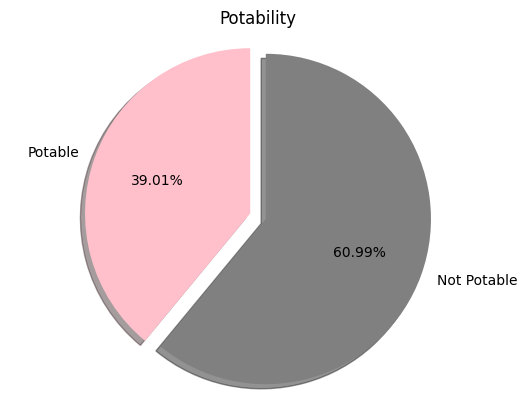

In [9]:
labels= ['Potable', 'Not Potable']
colors=['pink', 'gray']

Potable=iris['Potability']
NumOfPotable=0
NumOfNotPotable=0


for x in Potable:
    if x==1:
        NumOfPotable+=1

    else:
        NumOfNotPotable+=1

sizes= [NumOfPotable, NumOfNotPotable]
plt.pie(sizes,labels=labels, colors=colors, startangle=90, shadow=True,explode=(0.1, 0 ), autopct='%1.2f%%')
plt.title('Potability')
plt.axis('equal')
plt.show()

As we see in figure above and down,the potable water which means the water is safe represent 39.01% 
( about 1278 )of our dataset, while Not potable water represent 60.99% ( about 1998 ).


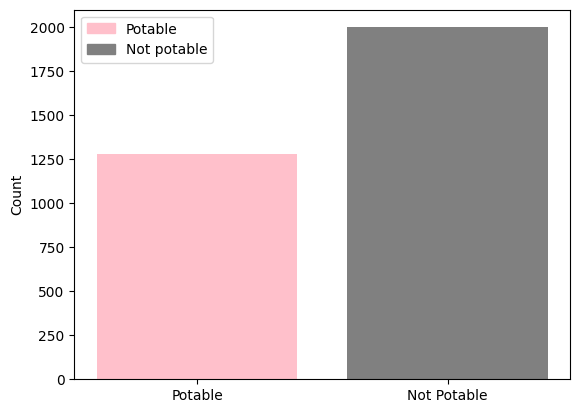

In [10]:

chart = {'Potable' : NumOfPotable, 'Not Potable' : NumOfNotPotable}
label = list(chart.keys())
value = list(chart.values())
colors = {'Potable':'pink', 'Not potable':'gray'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.ylabel('Count')
plt.bar(label, value,color=['pink', 'gray'])
plt.show()

The mean of ph is  7.080794504276835
The variance of ph is  2.5418547277358927


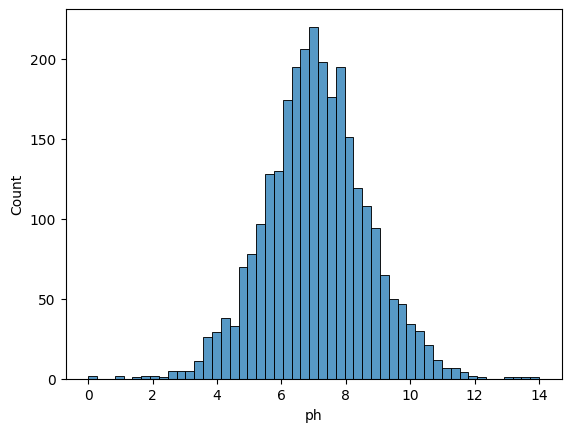

In [11]:
sns.histplot(x='ph',data=iris)

list = iris['ph'].copy().values
list = list[~np.isnan(list)]

print("The mean of ph is " , mean(list))
print("The variance of ph is " , statistics.variance(list))

plt.show()

Our dataset have different values of ph As shown in figure above. The range is between 0 and 14,
Almost ph values are 7. The lowest values are between 12 to 14 and between 2 to 1. The mean of ph is 7.085 and variance is  2.54.


The mean of Hardness is  196.36949601730154
The variance of Hardness is  1081.0787147379974


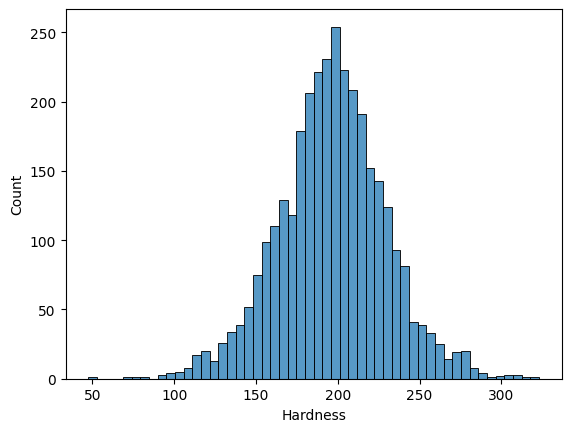

In [12]:
sns.histplot(x='Hardness',data=iris)

list = iris['Hardness'].copy().values
list = list[~np.isnan(list)]

print("The mean of Hardness is " , mean(list))
print("The variance of Hardness is " , statistics.variance(list))

plt.show()

According to the graphs we can see that almost of values of the Hardness is 200. Hardness between 50-100 and above 300 have the lowest frequency. The mean is 196.36 and the variance is .

The mean of Solids is  22014.092526077104
The variance of Solids is  76887834.36189838


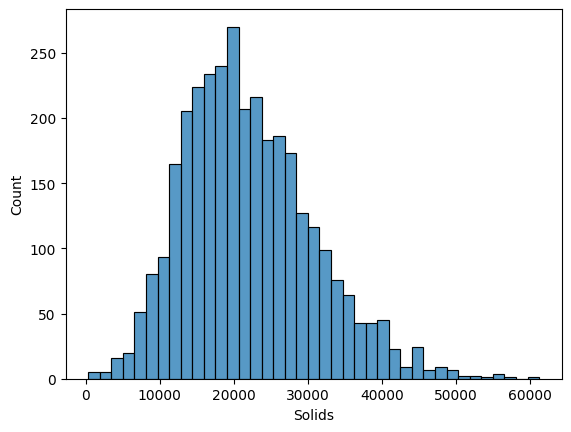

In [13]:
sns.histplot(x='Solids',data=iris)

list = iris['Solids'].copy().values
list = list[~np.isnan(list)]

print("The mean of Solids is " , mean(list))
print("The variance of Solids is " , statistics.variance(list))

plt.show()

From the figure above we can notice that solid values start from 0 to Almost 60000. The distribution of solids is higher is the left which means most of our dataset have frequency between 20K to 15K. The mean of  Solids is 22014.09 and the variance is 76887834.36.

The mean of Chloramines is  7.122276793425787
The variance of Chloramines is  2.50615776590587


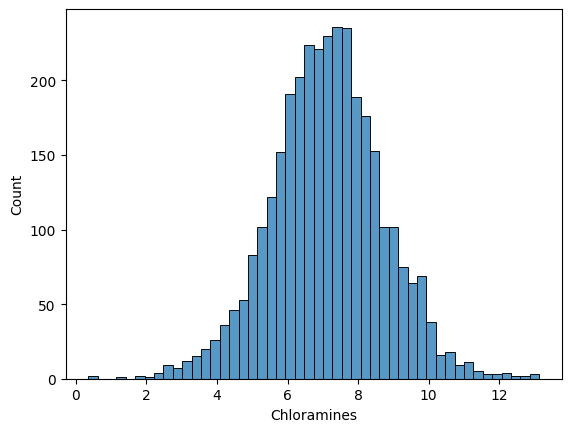

In [14]:
sns.histplot(x='Chloramines',data=iris)

list = iris['Chloramines'].copy().values
list = list[~np.isnan(list)]

print("The mean of Chloramines is " , mean(list))
print("The variance of Chloramines is " , statistics.variance(list))

plt.show()

As we can see above, chloramines variable have the highest frequency in almost 7. The mean is 7.12 and the variance is 2.50.

The mean of Sulfate is  333.77577661081347
The variance of Sulfate is  1715.3546738276493


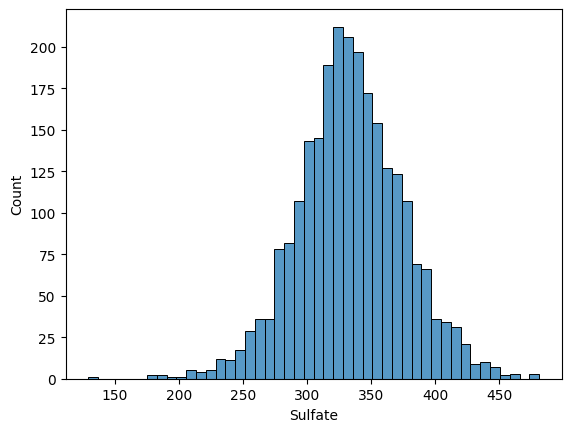

In [15]:
sns.histplot(x='Sulfate',data=iris)

list = iris['Sulfate'].copy().values
list = list[~np.isnan(list)]

print("The mean of Sulfate is " , mean(list))
print("The variance of Sulfate is " , statistics.variance(list))

plt.show()

According to image we can see that the distribution of sulfate in our dataset is little bit to right side. So , we have the most frequency in almost between 300 and 350. The mean is 333.77 and the variance is 1715.35.

The mean of Conductivity is  426.20511068255325
The variance of Conductivity is  6532.529329738223


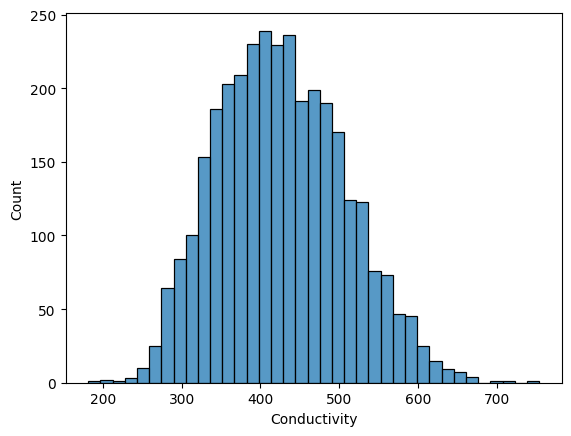

In [16]:
sns.histplot(x='Conductivity',data=iris)

list = iris['Conductivity'].copy().values
list = list[~np.isnan(list)]

print("The mean of Conductivity is " , mean(list))
print("The variance of Conductivity is " , statistics.variance(list))

plt.show()

According to the graphs we can see that almost of the frequency is near to 400. The mean is 426.20 and the variance is 6532.52.

The mean of Organic_carbon is  14.284970247677318
The variance of Organic_carbon is  10.943935812467114


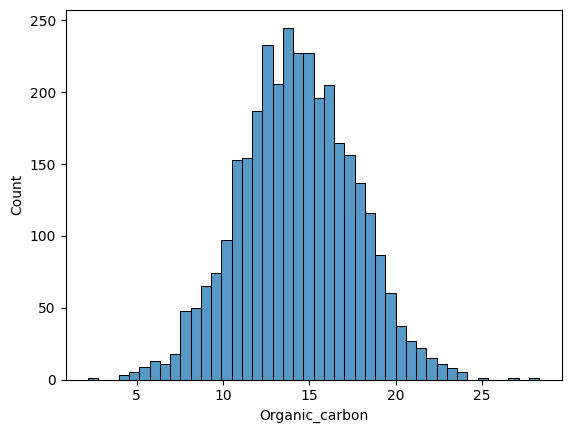

In [17]:
sns.histplot(x='Organic_carbon',data=iris)

list = iris['Organic_carbon'].copy().values
list = list[~np.isnan(list)]

print("The mean of Organic_carbon is " , mean(list))
print("The variance of Organic_carbon is " , statistics.variance(list))

plt.show()

We can see that most of the water have organic carbon near to 15. Also , there is a very small frequency having 25 and above. The mean is 14.28 and the variance is 10.94.

The mean of Trihalomethanes is  66.39629294676803
The variance of Trihalomethanes is  261.6308974588445


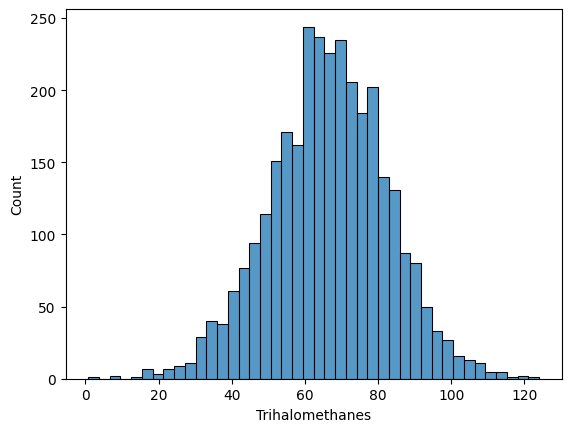

In [18]:
sns.histplot(x='Trihalomethanes',data=iris)

list = iris['Trihalomethanes'].copy().values
list = list[~np.isnan(list)]

print("The mean of Trihalomethanes is " , mean(list))
print("The variance of Trihalomethanes is " , statistics.variance(list))

plt.show()

We can see that, the highest value of frequency is between 60 to 80, which mean the huge amount water sample have Trihalomethanes in these range. The mean is 66.39 and the variance is 261.63.

The mean of Turbidity is  3.9667861697910585
The variance of Turbidity is  0.608996703473493


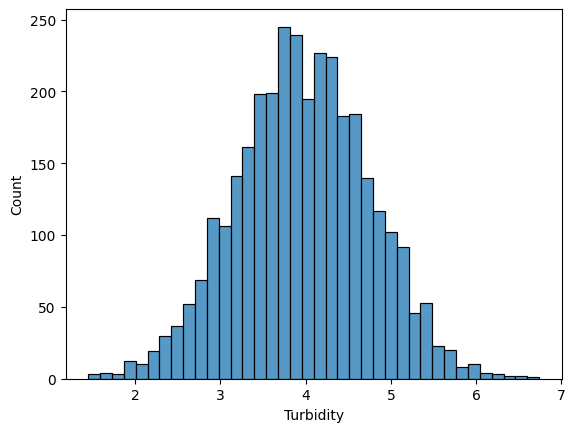

In [19]:
sns.histplot(x='Turbidity',data=iris)


list = iris['Turbidity'].copy().values
list = list[~np.isnan(list)]

print("The mean of Turbidity is " , mean(list))
print("The variance of Turbidity is " , statistics.variance(list))

plt.show()

According to the above. We have the highest frequency of water sample near to Turbidity 4. The mean is 3.96 and the variance is 0.60. 

# Data Preprocessing

In this part, we only needed to discretization, and remove the null value, which is what our dataset need for it 

# 1. Remove null value

In [21]:
iris

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


the dataset is contain 3276 rows before remove null value

In [22]:
iris.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

before remove null value:
1. ph contain 491 null value
2. Sulfate contain 781 null value
3. Trihalomethanes contain 162 null value

In [23]:
iris=iris.dropna()

In [24]:
iris

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


number of rows after remove null value are 2011

In [25]:
iris.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

after remove null value all null value are removed

# 2.Discretization

In the classification of pH, we divided it into 3 categories, acidic, neutral, and alkaline, as acidic from 0 to 6.5, neutral from 6.5 to 8.5, and alkaline from 8.5 to 14.

In [26]:
iris['ph_discretized']=pd.cut(iris['ph'], bins=[0,6.5,8.5,14], labels=['Acidic','Neutral','Alkaline'])

C:\Users\1saro\AppData\Local\Temp\ipykernel_11296\244800475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris['ph_discretized']=pd.cut(iris['ph'], bins=[0,6.5,8.5,14], labels=['Acidic','Neutral','Alkaline'])


In the classification of Hardness, we divided it into 4 categories, Soft, Mod Hard,Hard, and Very Hard, as Soft from 0 to 60, Mod Hard from 60 to 120,Hard from 120 to 180 ,and Very Hard from 180 to 1000000.

In [27]:
iris['Hardness_discretized']=pd.cut(iris['Hardness'], bins=[0,60,120,180,1000000], labels=['Soft','Mod Hard','Hard','Very Hard'])

C:\Users\1saro\AppData\Local\Temp\ipykernel_11296\2019247129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris['Hardness_discretized']=pd.cut(iris['Hardness'], bins=[0,60,120,180,1000000], labels=['Soft','Mod Hard','Hard','Very Hard'])


The remaining minerals were divided into 3 categories, which are low, medium and high

In [28]:
iris['Chloramines_discretized']=pd.qcut(iris['Chloramines'], q=3, labels=['Low','Medium','High'])

C:\Users\1saro\AppData\Local\Temp\ipykernel_11296\517016658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris['Chloramines_discretized']=pd.qcut(iris['Chloramines'], q=3, labels=['Low','Medium','High'])


In [29]:
iris['Conductivity_discretized']=pd.qcut(iris['Conductivity'], q=3, labels=['Low','Medium','High'])

C:\Users\1saro\AppData\Local\Temp\ipykernel_11296\400082838.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris['Conductivity_discretized']=pd.qcut(iris['Conductivity'], q=3, labels=['Low','Medium','High'])


In [30]:
iris['Organic_carbon_discretized']=pd.qcut(iris['Organic_carbon'], q=3, labels=['Low','Medium','High'])

C:\Users\1saro\AppData\Local\Temp\ipykernel_11296\2566744087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris['Organic_carbon_discretized']=pd.qcut(iris['Organic_carbon'], q=3, labels=['Low','Medium','High'])


In [31]:
iris['Solids_discretized']=pd.qcut(iris['Solids'], q=3, labels=['Low','Medium','High'])

C:\Users\1saro\AppData\Local\Temp\ipykernel_11296\3473228018.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris['Solids_discretized']=pd.qcut(iris['Solids'], q=3, labels=['Low','Medium','High'])


In [32]:
iris['Sulfate_discretized']=pd.qcut(iris['Sulfate'], q=3, labels=['Low','Medium','High'])

C:\Users\1saro\AppData\Local\Temp\ipykernel_11296\1552852792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris['Sulfate_discretized']=pd.qcut(iris['Sulfate'], q=3, labels=['Low','Medium','High'])


In [33]:
iris['Trihalomethanes_discretized']=pd.qcut(iris['Trihalomethanes'], q=3, labels=['Low','Medium','High'])

C:\Users\1saro\AppData\Local\Temp\ipykernel_11296\3678978129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris['Trihalomethanes_discretized']=pd.qcut(iris['Trihalomethanes'], q=3, labels=['Low','Medium','High'])


In [34]:
iris['Turbidity_discretized']=pd.qcut(iris['Turbidity'], q=3, labels=['Low','Medium','High'])

C:\Users\1saro\AppData\Local\Temp\ipykernel_11296\3761506080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris['Turbidity_discretized']=pd.qcut(iris['Turbidity'], q=3, labels=['Low','Medium','High'])


In [35]:
iris

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,ph_discretized,Hardness_discretized,Chloramines_discretized,Conductivity_discretized,Organic_carbon_discretized,Solids_discretized,Sulfate_discretized,Trihalomethanes_discretized,Turbidity_discretized
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,Neutral,Very Hard,High,Low,High,Medium,High,High,High
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,Alkaline,Very Hard,Medium,Medium,Low,Medium,Low,Low,Medium
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0,Acidic,Very Hard,Medium,Low,Low,High,Medium,Low,Low
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0,Alkaline,Very Hard,Medium,Low,Medium,High,High,High,Low
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0,Alkaline,Very Hard,Low,High,Low,Low,Low,Medium,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1,Alkaline,Very Hard,Low,Medium,Low,Low,Low,Low,High
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1,Neutral,Very Hard,Medium,Low,High,Low,Low,Low,Low
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1,Alkaline,Mod Hard,High,Medium,High,High,Low,Low,High
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1,Acidic,Very Hard,High,Medium,Low,High,Medium,Medium,Medium


our dataset after discretization, and remove null value contains 2011 rows and 19 columns.